In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
import numpy as np
from custom_dataset import Binary_Dataset
from matplotlib import pyplot as plt
from PIL import Image
import os
from inception import Inception3
%matplotlib inline

# Define Dataloaders for each class


In [2]:
#define relevant paths
labels_dir="Data\list_attr_celeba.csv"
label="Male"
image_dir="Data\img_align_celeba\img_align_celeba"

############################################define batch size for all data loaders here
bathsize=32

##############################################define num workers for data laoders here
workers=4

#define composed transforms
composed = transforms.Compose([transforms.ToTensor()])

ds=Binary_Dataset(labels_dir, label,image_dir ,transform=composed)
dataset_loader=DataLoader(ds,batch_size=bathsize, shuffle=True, num_workers=workers)

"""
for idx, (data, image) in enumerate(ds):
    print(idx)
"""


data=next(iter(dataset_loader))
sample, target = data
#print(sample)
print(target)


tensor([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 1, 1, 0])


tensor(0)


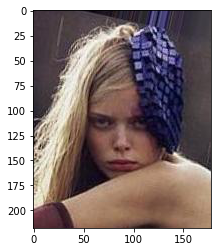

In [9]:
idx=4
plt.imshow(sample[idx])
print(target[idx])

# Define CNN's